<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>EDA Projesi - E Commerce (E-Ticaret)</b></p>

<b>İçindekiler:</b>
<ul>
<li><a href="#import-library">Kütüphanelerin Yüklenmesi</a></li>
<li><a href="#loading-dataset">Veri Setinin Yüklenmesi</a></li>
<li><a href="#understanding-dataset">Veri Setini Anlama</a></li>
<li><a href="#organizing-columns">Sütunları Düzenleme</a></li>
<li><a href="#nan-values">NaN Değerler</a></li>
<li><a href="#data-visualization">Veri Görselleştirme</a></li>
</ul>

<a id='import-library'></a>
# <font color='firebrick'> <b>Kütüphanelerin Yüklenmesi</b><font color='black'> 

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px

from skimpy import skim

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='firebrick'> <b>Veri Setinin Yüklenmesi</b><font color='black'> 

In [32]:
df0 = pd.read_csv("realistic_e_commerce_sales_data.csv")
df = df0.copy()

In [33]:
df.head()

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
0,CUST0268,Male,North,NaN,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08
1,CUST0046,Male,West,22.0,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09
2,CUST0169,Female,South,54.0,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28
3,CUST0002,Male,North,23.0,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18
4,CUST0173,Female,South,NaN,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19


In [34]:
df.sample(5)

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
370,CUST0129,Female,East,66.0,Smartphone,Electronics,800.0,3,2400,19.63,Delivered,2023-07-28
940,CUST0093,Female,North,66.0,Monitor,Electronics,300.0,5,1500,18.92,Delivered,2023-05-03
808,CUST0218,Female,East,36.0,Mouse,Accessories,30.0,5,150,6.78,In Transit,2023-07-18
682,CUST0220,Male,South,NaN,Mouse,Accessories,30.0,1,30,6.70,In Transit,2023-05-07
518,CUST0289,Female,East,37.0,Smartwatch,Wearables,200.0,5,1000,5.60,Returned,2023-11-18


<a id='understanding-dataset'></a>
# <font color='firebrick'> <b>Veri Setini Anlama</b><font color='black'> 

In [36]:
df.shape

(1000, 12)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      1000 non-null   object 
 1   Gender           1000 non-null   object 
 2   Region           950 non-null    object 
 3   Age              900 non-null    float64
 4   Product Name     1000 non-null   object 
 5   Category         1000 non-null   object 
 6   Unit Price       1000 non-null   float64
 7   Quantity         1000 non-null   int64  
 8   Total Price      1000 non-null   int64  
 9   Shipping Fee     1000 non-null   float64
 10  Shipping Status  950 non-null    object 
 11  Order Date       1000 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 93.9+ KB


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,900.0,46.695556,15.011400,18.0,35.00,49.000,59.000,69.000000
Unit Price,1000.0,457.703777,537.231434,30.0,50.00,200.000,800.000,3109.560612
Quantity,1000.0,3.008000,1.404246,1.0,2.00,3.000,4.000,5.000000
Total Price,1000.0,1346.600000,1834.037877,30.0,200.00,600.000,1500.000,7500.000000
Shipping Fee,1000.0,12.416390,4.412185,5.0,8.56,12.315,16.075,19.980000


In [39]:
df.describe(include= 'object').T

,count,unique,top,freq
Customer ID,1000,292,CUST0204,9
Gender,1000,2,Male,524
Region,950,4,West,246
Product Name,1000,7,Monitor,181
Category,1000,3,Electronics,477
Shipping Status,950,3,In Transit,329
Order Date,1000,340,2024-01-03,20


In [40]:
df.isnull().sum()

Customer ID          0
Gender               0
Region              50
Age                100
Product Name         0
Category             0
Unit Price           0
Quantity             0
Total Price          0
Shipping Fee         0
Shipping Status     50
Order Date           0
dtype: int64

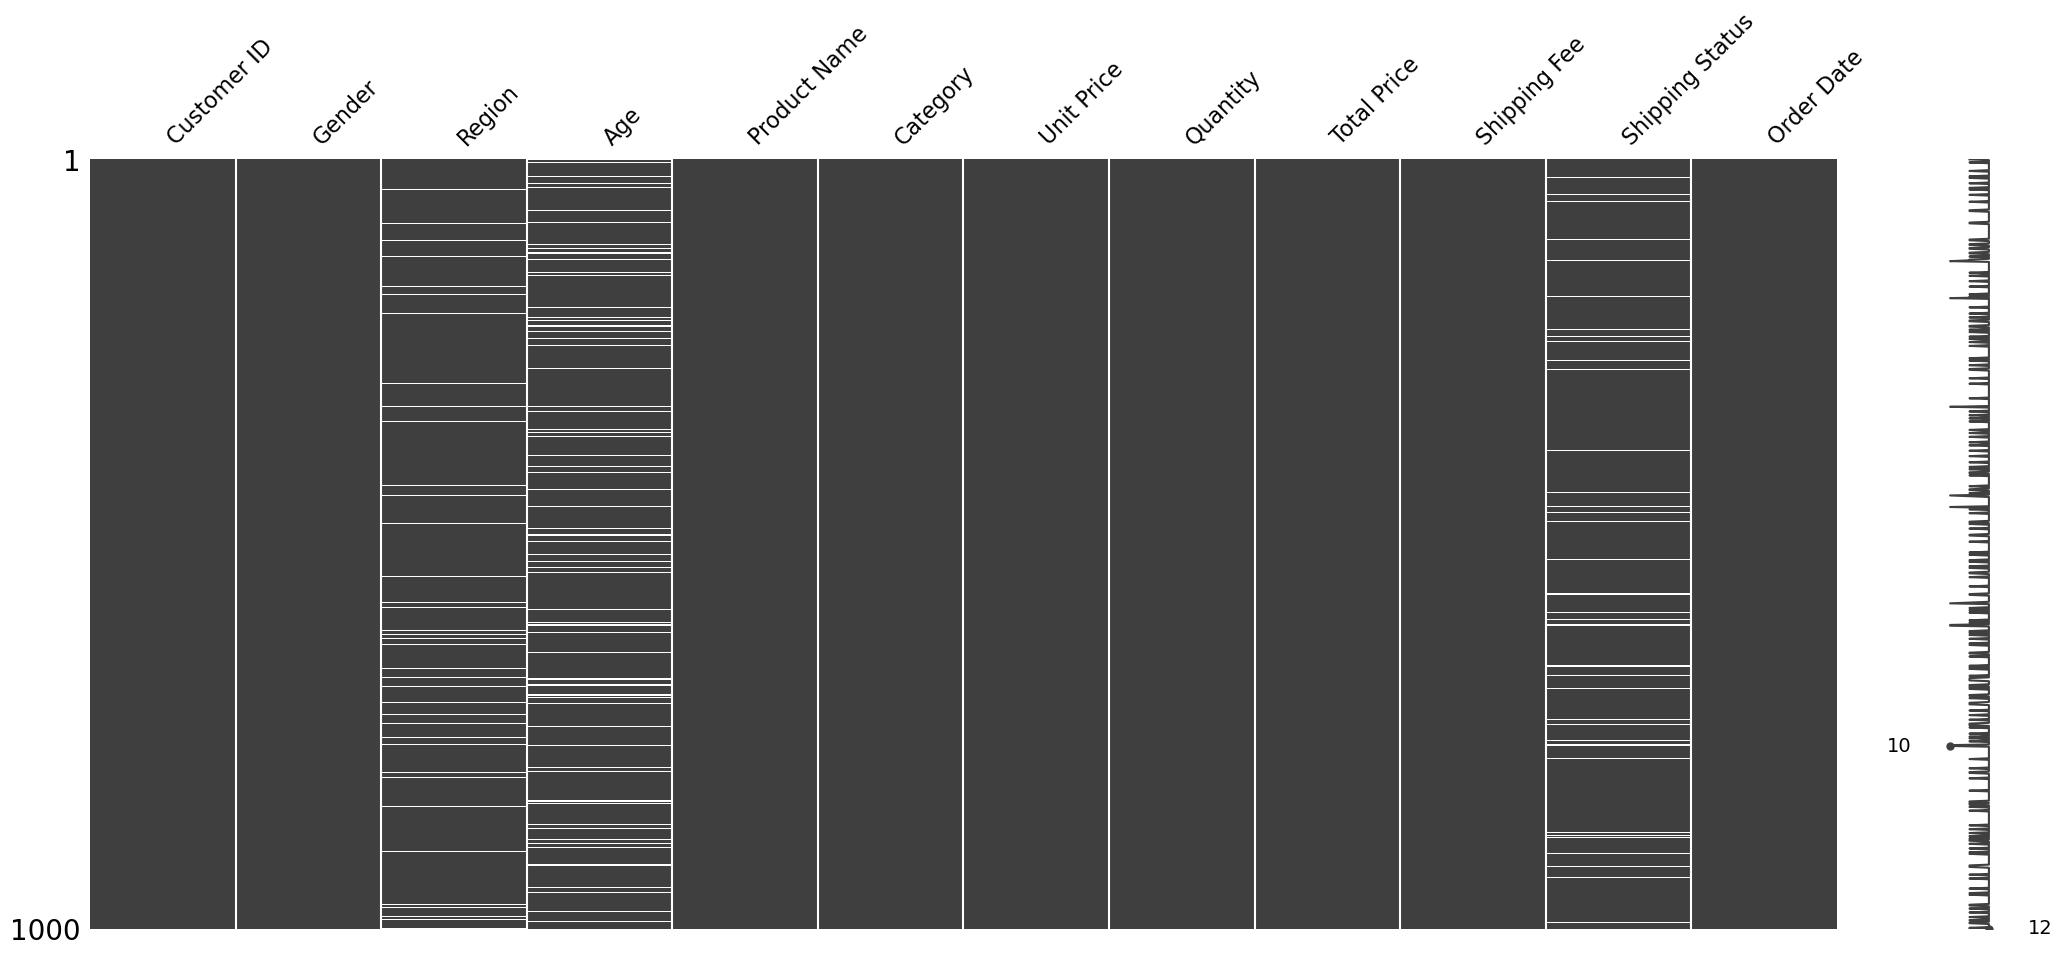

In [41]:
msno.matrix(df);

In [42]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1000   │ │ string      │ 7     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 3     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 2     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA    ┃ NA %   ┃ mean    ┃ sd      ┃ p0  ┃ p25    ┃ p50     ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ Age              │   100 │     10 │    46.7 │   15.01 │  18 │     35 │      49 │     59 │     69 │ ▅▅▆▅▇▇  │  │
│ │ Unit Price       │     0 │      0 │   457.7 │   537.2 │  30 │     50 │     200 │    800 │   3110 │   ▇▂▂   │  │
│ │ Quantity         │     0 │      0 │   3.008 │   1.404 │   1 │      2 │       3 │      4 │      5 │ ▇▇ ▇▇▇  │  │
│ │ Total Price      │     0 │      0 │    1347 │    1834 │  30 │    200 │     600 │   1500 │   7500 │  ▇▁▁▁   │  │
│ │ Shipping Fee     │     0 │      0 │   12.42 │   4.412 │   5 │   8.56 │   12.32 │  16.07 │  19.98 │ ▇▇▇▇▆▇  │  │
│ └──────────────────┴───────┴────────┴─────────┴─────────┴─────┴────────┴─────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA     ┃ NA %       ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Customer ID                     │      0 │          0 │                          1 │                  1000 │  │
│ │ Gender                          │      0 │          0 │                          1 │                  1000 │  │
│ │ Region                          │     50 │          5 │                       0.95 │                   950 │  │
│ │ Product Name                    │      0 │          0 │                          1 │                  1000 │  │
│ │ Category                        │      0 │          0 │                          1 │                  1000 │  │
│ │ Shipping Status                 │     50 │          5 │                        1.3 │                  1279 │  │
│ │ Order Date                      │      0 │          0 │                          1 │                  1000 │  │
│ └─────────────────────────────────┴────────┴────────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [43]:
df.duplicated().sum()

0

<a id='organizing-columns'></a>
# <font color='firebrick'> <b>Sütunları Düzenleme</b><font color='black'> 

In [45]:
df.columns

Index(['Customer ID', 'Gender', 'Region', 'Age', 'Product Name', 'Category',
       'Unit Price', 'Quantity', 'Total Price', 'Shipping Fee',
       'Shipping Status', 'Order Date'],
      dtype='object')

In [46]:
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.columns

Index(['customer_id', 'gender', 'region', 'age', 'product_name', 'category',
       'unit_price', 'quantity', 'total_price', 'shipping_fee',
       'shipping_status', 'order_date'],
      dtype='object')

## <font color='indianred'> <b>"customer_id" Sütunu</b><font color='black'> 

In [48]:
df.customer_id.nunique()

292

## <font color='indianred'> <b>"gender" Sütunu</b><font color='black'> 

In [50]:
df.gender.nunique()

2

In [51]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

## <font color='indianred'> <b>"region" Sütunu</b><font color='black'> 

In [53]:
df.region.nunique()

4

In [54]:
df.region.unique()

array(['North', 'West', 'South', 'East', nan], dtype=object)

## <font color='indianred'> <b>"age" Sütunu</b><font color='black'> 

In [56]:
df.age.nunique()

52

In [57]:
df.age.unique()

array([nan, 22., 54., 23., 64., 27., 18., 29., 49., 67., 41., 60., 66.,
       36., 57., 30., 32., 59., 37., 52., 58., 25., 31., 28., 53., 35.,
       43., 61., 19., 38., 44., 68., 42., 51., 46., 62., 33., 24., 21.,
       50., 48., 63., 47., 45., 40., 55., 69., 26., 20., 65., 39., 56.,
       34.])

## <font color='indianred'> <b>"product_name" Sütunu</b><font color='black'> 

In [59]:
df.product_name.nunique()

7

In [60]:
df.product_name.unique()

array(['Monitor', 'Headphones', 'Laptop', 'Smartwatch', 'Keyboard',
       'Mouse', 'Smartphone'], dtype=object)

## <font color='indianred'> <b>"category" Sütunu</b><font color='black'> 

In [62]:
df.category.nunique()

3

In [63]:
df.category.unique()

array(['Electronics', 'Accessories', 'Wearables'], dtype=object)

## <font color='indianred'> <b>"unit_price" Sütunu</b><font color='black'> 

In [65]:
df.unit_price.nunique()

13

In [66]:
df.unit_price.unique()

array([ 300.        ,  100.        , 1500.        ,  200.        ,
         50.        ,   30.        ,  800.        , 1658.43232666,
         62.19121225,  103.65202042,  621.9121225 ,  207.30404083,
       3109.56061249])

In [67]:
df.unit_price = round(df.unit_price, 2)

In [68]:
df.unit_price.unique()

array([ 300.  ,  100.  , 1500.  ,  200.  ,   50.  ,   30.  ,  800.  ,
       1658.43,   62.19,  103.65,  621.91,  207.3 , 3109.56])

## <font color='indianred'> <b>"quantity" Sütunu</b><font color='black'> 

In [70]:
df.quantity.nunique()

5

In [71]:
df.quantity.unique()

array([5, 2, 1, 3, 4], dtype=int64)

## <font color='indianred'> <b>"total_price" Sütunu</b><font color='black'> 

In [73]:
df.total_price.nunique()

26

In [74]:
df.total_price.unique()

array([1500,  200,  300,  500, 4500,  400,  100,   30,   90,  250,  600,
       6000, 1600, 1000, 1200, 4000, 3200,   50,  800,  150,  900, 3000,
       7500,   60,  120, 2400], dtype=int64)

## <font color='indianred'> <b>"shipping_fee" Sütunu</b><font color='black'> 

In [76]:
df.shipping_fee.nunique()

730

## <font color='indianred'> <b>"shipping_status" Sütunu</b><font color='black'> 

In [78]:
df.shipping_status.nunique()

3

In [79]:
df.shipping_status.unique()

array(['Returned', 'In Transit', 'Delivered', nan], dtype=object)

## <font color='indianred'> <b>"order_date" Sütunu</b><font color='black'> 

In [81]:
df.order_date.nunique()

340

In [82]:
df.order_date.dtype

dtype('O')

In [83]:
# order_date sütununun tipini datetime olarak değiştirme işlemi
df['order_date'] = pd.to_datetime(df['order_date'])

<a id='nan-values'></a>
# <font color='firebrick'> <b>NaN Değerler</b><font color='black'> 

In [85]:
df.isnull().sum()

customer_id          0
gender               0
region              50
age                100
product_name         0
category             0
unit_price           0
quantity             0
total_price          0
shipping_fee         0
shipping_status     50
order_date           0
dtype: int64

## <font color='indianred'> <b>"region" Sütunundaki NaN Değerler</b><font color='black'> 

In [87]:
df.groupby('product_name')['region'].apply(lambda x: x.mode()[0])

product_name
Headphones     East
Keyboard       West
Laptop         West
Monitor       South
Mouse          West
Smartphone    South
Smartwatch     East
Name: region, dtype: object

In [88]:
df['region'] = df['region'].fillna(df['product_name'].map( df.groupby('product_name')['region'].apply(lambda x: x.mode()[0])))

In [89]:
df.region.isnull().sum()

0

## <font color='indianred'> <b>"shipping_status" Sütunundaki NaN Değerler</b><font color='black'> 

In [91]:
shipping_status_mode = df.groupby("customer_id")['shipping_status'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

In [92]:
df['shipping_status'] = df['shipping_status'].fillna(df['customer_id'].map(shipping_status_mode))

In [93]:
df.shipping_status.isnull().sum()

3

In [94]:
df['shipping_status'] = df['shipping_status'].fillna(df['shipping_status'].mode()[0])

In [95]:
df.shipping_status.isnull().sum()

0

## <font color='indianred'> <b>"age" Sütunundaki NaN Değerler</b><font color='black'> 

In [97]:
age_mode = df.groupby('customer_id')['age'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

In [98]:
df['age'] = df['age'].fillna(df['customer_id'].map(age_mode))

In [99]:
df.age.isnull().sum()

7

In [100]:
df['age'] = df['age'].fillna(df.age.median())

In [101]:
df.age.isnull().sum()

0

In [102]:
df.isnull().sum()

customer_id        0
gender             0
region             0
age                0
product_name       0
category           0
unit_price         0
quantity           0
total_price        0
shipping_fee       0
shipping_status    0
order_date         0
dtype: int64

In [217]:
# df'nin son halini csv dosyası olarak kaydetme
# df.to_csv("edited_data.csv", index= False)

<a id='data-visualization'></a>
# <font color='firebrick'> <b>Veri Görselleştirme</b><font color='black'> 

## <font color='indianred'> <b>Müşterilerin Cinsiyete Göre Dağılımı</b><font color='black'> 

In [106]:
type_counts = df['gender'].value_counts()
type_counts

gender
Male      524
Female    476
Name: count, dtype: int64

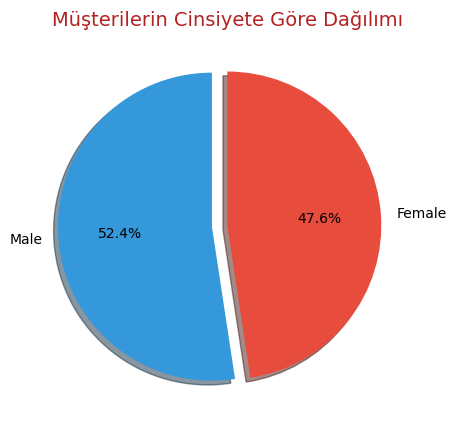

In [163]:
plt.figure(figsize=(8, 5))

plt.pie(x= type_counts.values,
        labels= type_counts.index,
        colors= ['#3498db', '#e74c3c'],
        autopct= '%1.1f%%',
        explode= [0.1, 0],
        shadow= True,
        startangle= 90
       ) 

plt.title('Müşterilerin Cinsiyete Göre Dağılımı', fontdict= {"color": "firebrick", "fontsize": 14})
plt.show()

Pasta grafiği, satışların cinsiyet dağılımını göstermektedir; burada **erkek müşteriler** satışların **%52,4'ünü** ve **kadın müşteriler %47,6**'sını oluşturmaktadır. Bu dağılım, satışların cinsiyetler arasında neredeyse eşit şekilde bölündüğünü, erkek müşteriler için ise hafif bir fark olduğunu göstermektedir. Dağıtımın dengeli yapısı, hem erkeklerin hem de kadınların ürünle ilgilendiğini ortaya koyuyor ve pazarlama stratejilerinde her iki cinsiyeti de hedeflemenin önemini vurgulamaktadır.

## <font color='indianred'> <b>Müşterilerin Cinsiyete ve Bölgelere Göre Dağılımı</b><font color='black'> 

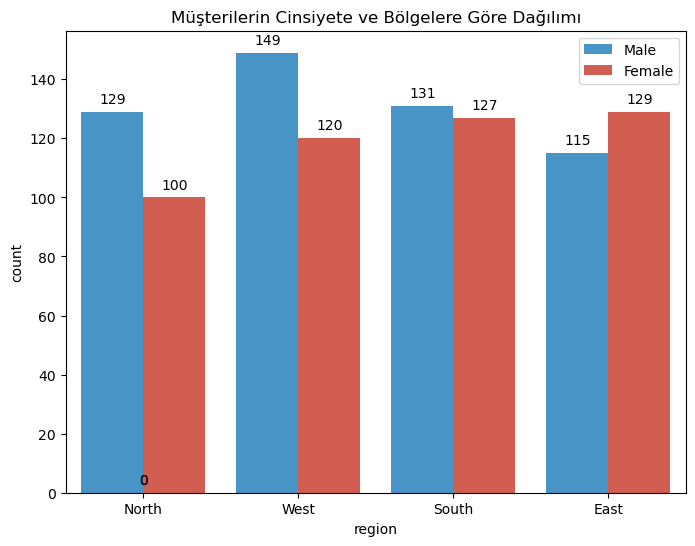

In [168]:
plt.figure(figsize=(8, 6))
bar_plot1 = sns.countplot(x='region', hue='gender', data=df, palette=['#3498db', '#e74c3c'])
plt.title('Müşterilerin Cinsiyete ve Bölgelere Göre Dağılımı')
plt.legend(bbox_to_anchor= (1,1))

for p in bar_plot1.patches:
    bar_plot1.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9),
                      textcoords = 'offset points',
                      color = 'black') 

plt.show()

Bu grafik, bölgeler arası müşteri dağılımındaki bazı cinsiyet dengesizliklerini ortaya koymaktadır. **Kuzey ve Batı'daki erkek müşterilerin baskınlığı** bu bölgelerde sunulan ürün veya hizmetlerin erkek demografisine daha çok hitap edebileceğini göstermketedir. Örneğin bu bölgelerde teknoloji veya sporla ilgili ürünlerde satış yoğunluğu daha yüksek olabilir.

**Güney'de** **eşitliğe yakın cinsiyet dağılımı** daha dengeli ve çeşitli bir müşteri tabanına işaret etmekte ve bu bölgenin hem erkek hem de kadın müşterilere eşit şekilde hitap ettiği anlamına gelmektedir. Öte yandan **Doğu'da kadın müşteri sayısının daha fazla olması** bu bölgedeki ürün veya hizmetlerin daha çok kadınlara yönelik olabileceğini veya kadınların bu bölgede satın alma gücünün daha yüksek olabileceğini düşündürmektedir.

Bu analizde dikkate alınması gereken önemli faktörlerden biri, her bölgenin demografik yapısıdır. Bölgesel pazarlama stratejileri bu bilgilere dayanarak optimize edilebilmektedir. Örneğin, Doğu'da kadınlara özel daha fazla kampanya hedeflemek daha etkili olabilirken, Kuzey ve Batı'da erkek odaklı pazarlama stratejilerine odaklanmak daha iyi sonuçlar verebilmektedir.

## <font color='indianred'> <b>Müşterilerin Yaş Dağılımı</b><font color='black'> 

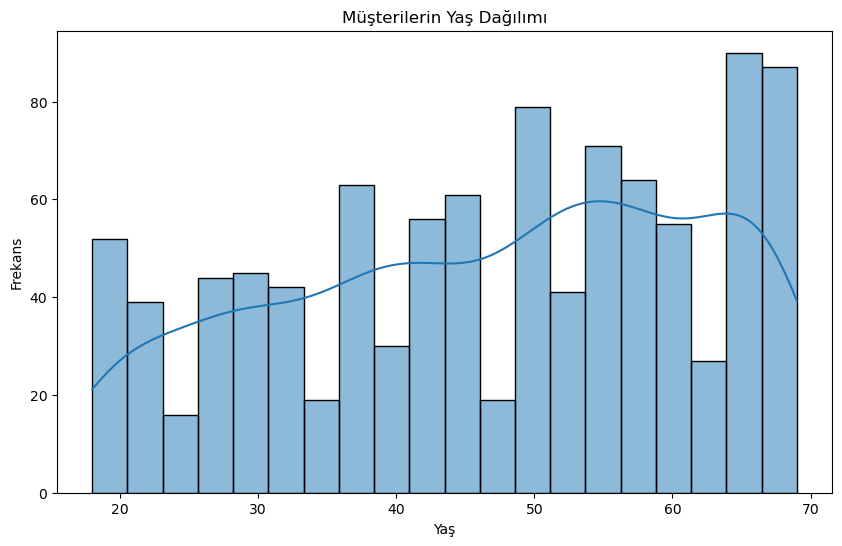

In [174]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Müşterilerin Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()

Bu histogram müşterilerin yaş dağılımını göstermektedir. Temel gözlemler şunları içermektedir:

 - 20'li ve 30'lu yaşlarındaki müşteri sayısında hafif bir düşüş görülürken, 40'lı ve 50'li yaş gruplarında artıgözlemlenmektedirar.
 - 60 ve 70 yaş aralığındaki müşteri kitlesinde dikkat çekici bir yoğunluk var, bu da daha yaşlı müşterilerin ürünlere daha fazla ilgi gösterebileceğigöstermektediryor.
 - Bu dağılımları anlamak, işletmelrin, ürünlerle daha fazla etkileşime sahip görünen daha yaşlı müşterilere odaklanarak doğru hedef kitleyi hedeflemesine yardımcı olabilir.

## <font color='indianred'> <b>En Çok Satılan 10 Ürün</b><font color='black'> 

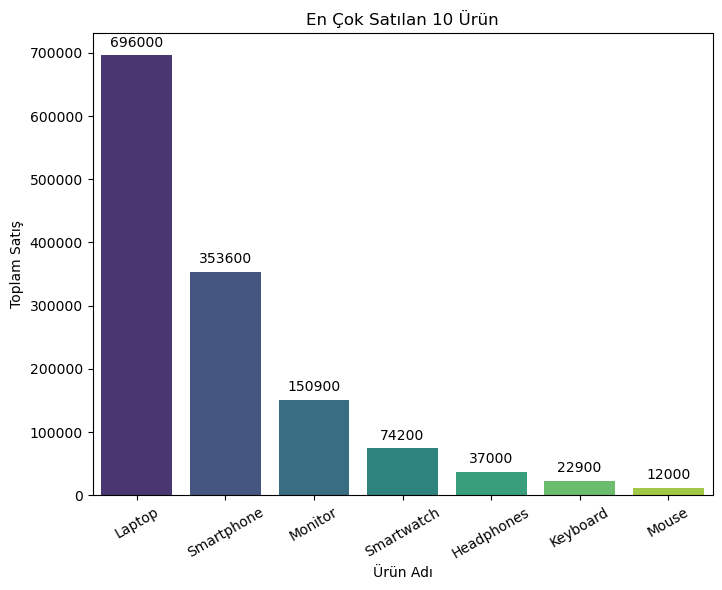

In [178]:
product_sales = df.groupby('product_name')['total_price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
bar_plot2 = sns.barplot(x=product_sales.index, y=product_sales.values, palette= "viridis")

plt.xticks(rotation=30)
plt.title('En Çok Satılan 10 Ürün')
plt.ylabel('Toplam Satış')
plt.xlabel('Ürün Adı')

for p in bar_plot2.patches:
    bar_plot2.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9),
                      textcoords = 'offset points',
                      color = 'black') 

plt.show()

Bu grafik, müşterilerin öncelikle dizüstü bilgisayarlar ve akıllı telefonlar gibi yüksek fiyatlı ürünleri satın aldığını, klavye ve fare gibi daha küçük teknolojik aksesuarların ise çok daha az popüler olduğunu göstermektedir.

## <font color='indianred'> <b>Birim Fiyatların Kategorilere Göre Dağılımı</b><font color='black'> 

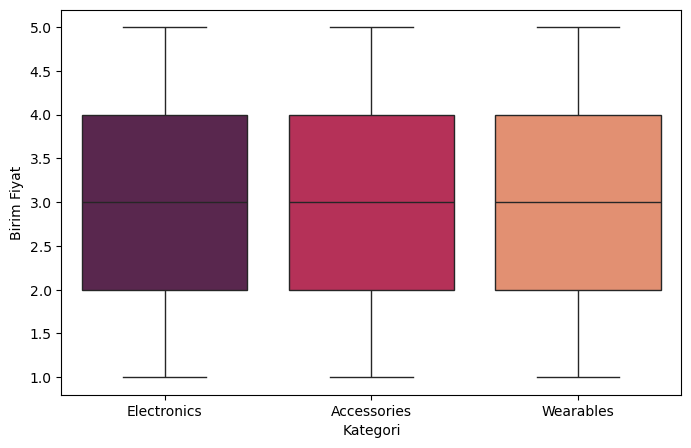

In [181]:
plt.figure(figsize=(8, 5))

sns.boxplot(x='category', y='quantity', data=df, palette=("rocket"))

plt.xlabel('Kategori')
plt.ylabel('Birim Fiyat')

plt.show()

Bu kutu grafiği, birim fiyatların farklı ürün kategorilerindeki dağılımını göstermektedir. Kategoriler arasında bazı farklılıklar vardır:

 - **Elektronik** ve **Aksesuarlar** benzer fiyat aralıklarına sahiptir; ortalama fiyatlar 3 ile 3,5 arasındadır.
 - **Giyilebilir ürünler** biraz daha dar bir aralığa sahiptir ancak ortalama fiyat diğer iki kategoriyle karşılaştırıldığında daha yüksek görünmektedir.
 - Herhangi bir kategoride aykırı değer görülmemesi, birim fiyatların her kategori içinde nispeten birbirine yakın ve tutarlı olduğunu göstermektedir.

## <font color='indianred'> <b>Adete Göre Ürün Sayıları</b><font color='black'> 

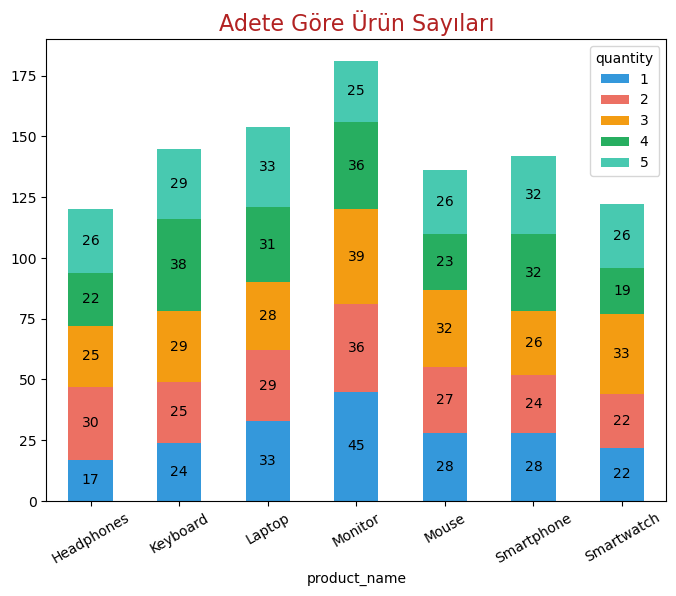

In [187]:
content_category_cross = pd.crosstab( df['product_name'], df['quantity'])

ax = content_category_cross.plot(kind='bar',
                            stacked=True,
                            figsize=(8,6),
                            color= ["#3498db", "#ec7063", "#f39c12", "#27ae60", "#48c9b0"]
                           )

plt.title("Adete Göre Ürün Sayıları", fontdict={'fontsize': 16, 'color': 'firebrick'})
plt.xticks(rotation= 30)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10, color='black')

plt.show()

Grafik, Monitörlerin ve Dizüstü Bilgisayarların daha büyük miktarlarda satın alınma eğiliminde olduğunu göstermektedir; bu da büyük olasılıkla işletmelerden veya kurumlardan gelen toplu alımlara yönelik talebin arttığını göstermektedir. Buna karşılık Kulaklıklar, Akıllı Saatler ve diğer ürünler, bireysel ve toplu alıcıların bir karışımını yansıtan daha dengeli bir dağılım gözlenmektedir. Klavye, Fare ve Akıllı Telefon gibi ürünlerin satışları orta düzeyde görünmekte ve hem bireysel tüketicilere hem de daha büyük siparişlere hizmet etmektedir.

Bu analiz, ürün türüne göre satın alma davranışı değişikliklerini vurgulayarak, özellikle monitörler ve dizüstü bilgisayarlar gibi kategorilerdeki toplu satın alımlar için hedefli pazarlama stratejileri potansiyeline işareetmektediror.

## <font color='indianred'> <b>Bölgelere Göre Toplam Satışlar</b><font color='black'> 

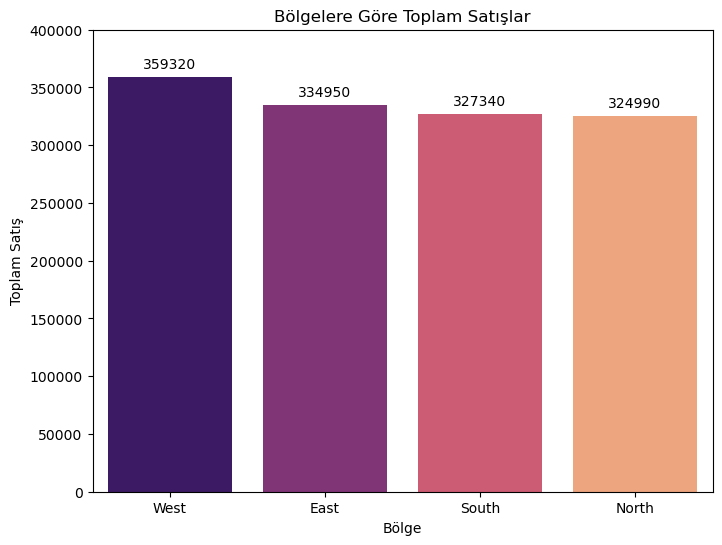

In [191]:
region_sales = df.groupby('region')['total_price'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))

bar_plot3 = sns.barplot(x=region_sales.index, y=region_sales.values, palette= "magma")

for p in bar_plot3.patches:
    bar_plot3.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center', 
                      xytext = (0, 9),
                      textcoords = 'offset points',
                      color = 'black') 

plt.yticks(np.arange(0, 400001, 50000))

plt.title('Bölgelere Göre Toplam Satışlar')
plt.ylabel('Toplam Satış')
plt.xlabel('Bölge')

plt.show()

"Bölgeye Göre Toplam Satış" çubuk grafiği, satışların bölgeler arasında nispeten eşit bir şekilde dağıldığını ortaya koyuyor; **Batı 359320** ile önde ve **Kuzey 324990** ile en düşük satışa sahip. Batı bölgesi toplam satışlarda hafif bir avantaj gösterirken, bölgeler arasındaki farkın az olması dengeli bir pazar performansına işaret etmektedir. Bu tutarlılık, şirketin ürün ve hizmetlerinin tüm bölgelerde iyi karşılandığını gösterebilir, ancak satışlarını diğer bölgelerle uyumlu hale getirmek için Kuzey'de hala iyileştirme yapılması gereken yerler olabilmektedir.

## <font color='indianred'> <b>Sevkiyat Durumu Dağılımı</b><font color='black'> 

In [198]:
status = df.shipping_status.value_counts()
status

shipping_status
In Transit    343
Delivered     338
Returned      319
Name: count, dtype: int64

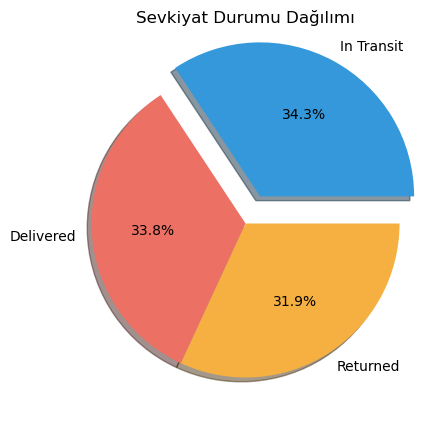

In [200]:
plt.figure(figsize=(8, 5))
plt.pie(x= status.values,
        labels = status.index,
        autopct='%1.1f%%',
        shadow= True,
        colors= ['#3498db', '#ec7063', '#f5b041'],
        explode= [0.2, 0, 0]
       )
plt.title('Sevkiyat Durumu Dağılımı')
plt.show()

Grafik, tüm kategorilerde dengeli bir bölünme göstermektedir; "transit halinde" %34,3, "teslim edildi" %33,8 ve "iade edildi" %31,9. Neredeyse eşit oranlar, nakliye sürecindeki potansiyel verimsizliklere, özellikle de ürün kalitesi veya müşteri memnuniyetiyle ilgili sorunlara işaret edebilecek yüksek iade oranına işaret etmektedir.**Teslimat ve iade süreçlerini optimize etmek, iade edilen ürünlerin yüzdesinin azaltılmasına ve müşteri deneyiminin iyileştirilmesine yardımcı olabilir.**

## <font color='indianred'> <b>Müşteri Yaşı vs Toplam Satışlar</b><font color='black'> 

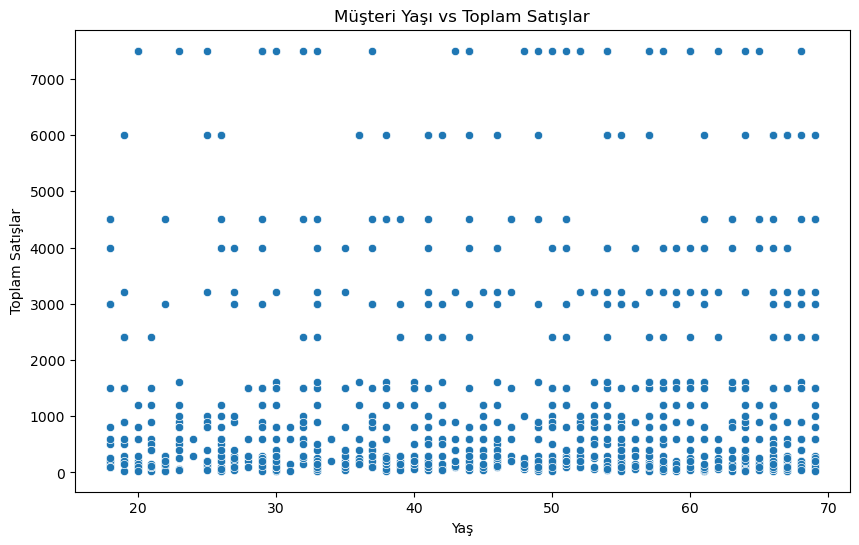

In [203]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='total_price', data=df)
plt.title('Müşteri Yaşı vs Toplam Satışlar')
plt.xlabel('Yaş')
plt.ylabel('Toplam Satışlar')
plt.show()

Bu dağılım grafiği müşteri yaşı ile toplam satışlar arasındaki ilişkiyi göstermektedir. Bazı gözlemler:

 - Yaş aralığı 70'e kadar uzanmaktadır ve tüm yaş gruplarında değişen toplam satış seviyeleri bulunmaktadır.
 - Toplam satışların önemli bir yoğunlaşması 0 ile 2000 yılları arasında, özellikle genç müşteriler için ortaçıkmaktadıryor.
 - 3000'in üzerindeki satış değerleri daha az sıklıkta görülse de 20-60 yaş aralığında ortçıkmaktadırıyor.
 - Satışların yaşla birlikte azaldığını veya arttığını gösteren net bir eğilim yok; bu da yaşın toplam satışlarla doğrudan ilişkili olmayabilecegöstermektedirriyor.

## <font color='indianred'> <b>Kargo Ücreti vs Toplam Satışlar</b><font color='black'> 

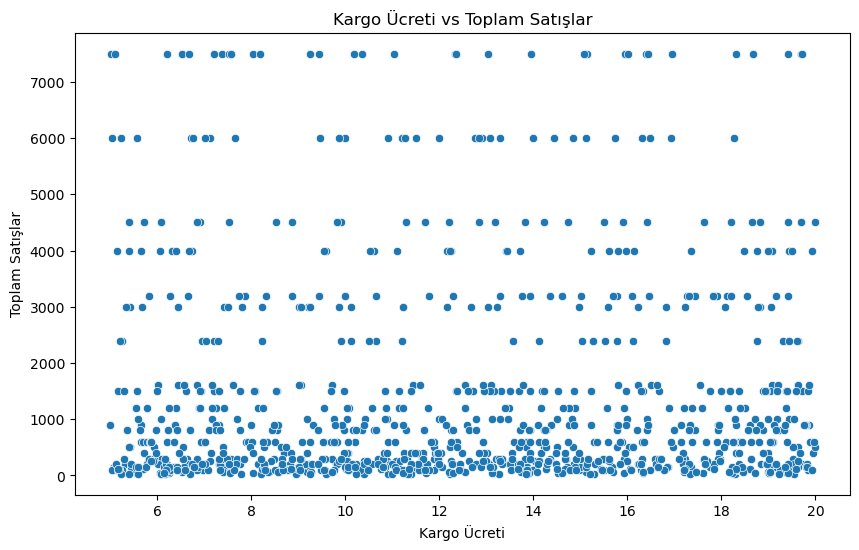

In [208]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='shipping_fee', y='total_price', data=df)
plt.title('Kargo Ücreti vs Toplam Satışlar')
plt.xlabel('Kargo Ücreti')
plt.ylabel('Toplam Satışlar')
plt.show()

Bu dağılım grafiği, kargo ücretleri ile toplam satışlar arasındaki ilişkiyi göstermektedir. Veriler, özellikle 0 ila 1000 toplam satış arasında olmak üzere belirli fiyat seviyelerindeki nokta kümeleri ile çeşitli toplam satış miktarlarına yayılmaktadır. Kargo ücreti ile toplam satışlar arasında doğrudan bir korelasyon olduğunu gösteren net bir doğrusal veya tutarlı model gözlemlenmemektedir; bu da diğer faktörlerin toplam satışları tek başına kargo ücretinden daha önemli ölçüde etkileyebileceğini göstermektedir.

## <font color='indianred'> <b>E-Commerce Veri Seti Korelasyonu</b><font color='black'> 

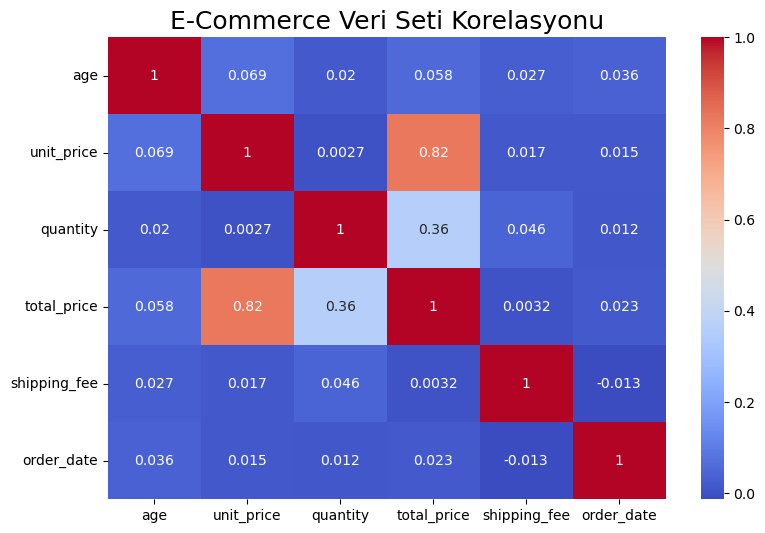

In [211]:
plt.figure(figsize=(9, 6))

numeric_df = df.select_dtypes(exclude="object")

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('E-Commerce Veri Seti Korelasyonu', fontsize=18)
plt.show()

**Birim Fiyat ile Toplam Fiyat Arasındaki Güçlü Korelasyon (0,82):**
 - Birim fiyat ile toplam fiyat arasında beklendiği gibi güçlü pozitif bir korelasyon vadırr. Bu mantıklıdır çünkü birim fiyat arttıkça, özellikle miktar aynı kalırsa veya artarsa, toplam fiyat da doğal olarak artacaktır.

**Miktar ile Toplam Fiyat Arasında Orta Düzeyde Korelasyon (0,36):**
 - Satın alınan ürün miktarı ile toplam fiyat arasında orta düzeyde pozitif bir korelasyon vardır. Bu, etkinin birim fiyattan daha az doğrudan olmasına rağmen, daha büyük siparişlerin daha yüksek toplam satışlara yol açma eğiliminde olduğunu göstermektedir.

**Diğer Değişkenler Arasındaki Korelasyonun Zayıf veya Önemsiz Olması:**
 - Nakliye ücreti, toplam fiyat (0,0032) dahil olmak üzere diğer değişkenlerle neredeyse hiç korelasyonmemektedirstermez. Bu, nakliye maliyetlerinin nispeten sabit kaldığını veya diğer faktörlerle ilgisiz olduğunu göstermektedir.
 - Yaş, sipariş tarihi ve nakliye ücreti diğer özelliklerle minimum düzeyde korelasyomektedirsteriyor; bu da bunların bu veri kümesindeki birim fiyatı, miktarı veya toplam fiyatı önemli ölçüde etkilemediği anlamektedir geliyor.

**Yaş ile Sipariş Detayları Arasında İlişki Yok:**
 - Müşterinin yaşının birim fiyat veya toplam fiyat gibi faktörlerle neredeyse hiçbir ilişkisi yoktur, bu da bu veri setinde yaşın satın alma davranışının önemli bir göstergesi olmadığgelmektediramına gelir.

Genel olarak, bu veri kümesindeki en güçlü ilişkiler birim fiyat ile toplam fiyat arasında ve miktar ile toplam fiyat arasındadır. Gönderim ücreti, yaş ve sipariş tarihi gibi diğer değişkenler, temel satın alma ölçümleriyle çok az veya hiç anlamlgöstermemektedirn göstermiyor; bu da bunların toplam satışları veya müşteri davranışını analiz ederken önemli faktörler olmagöstermektedirni gösteriyor.

**Proje Özeti:**
Yapılan a
Analiz birkaç kritik bulguyvurgulamaktadırorKargoim ücretleri ile toplam satışlar arasında korelasyonun olmaması, ürün fiyatlandırmasını ve toplu teklifleri optimize etme çabalarının, gönderim maliyeti ayarlamalarına odaklanmaktan daha yüksek getiri sağlayabileceğini göstermektedir. Dizüstü bilgisayarların ve monitörlerin toplu olarak satın alınmasına yönelik güçlü talep, potansiyel iş ortaklıklarını veya hedeflenen pazarlama stratejilerini aklgetirmektediror. Ayrıca birim fiyat ile toplam fiyat arasındaki güçlü korelasyon, yüksek talep gören ürünler için stratejik fiyatlandırmanın önemini doğrulamaktadır. Son olarak bölgesel satış farklılıkları, satışları ve müşteri memnuniyetini en üst düzeye çıkarmak için bölgeye özgü iş stratejilerine olan ihtiyacın altınçizmektediror.

**Sonuç olarak bu analkargoliye ücretleri, ürün miktarları ve farklı değişkenler arasındaki korelasyonlar gibi temel faktörleri vurgulayarak bir e-ticaret işletmesinin satış dinamikleri hakkında ayrıntılı bir bisağlamaktadırğlar. Sonuçlar, özellikle toplu alımlar, müşteri davranışları ve fiyatlandırma stratejileriyle ilgili olarak iş kararlarına yön verebilecek birkaç önemli eğilgöstermektediriyor.**

<p style="background-color:firebrick;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>TEŞEKKÜRLER!</b></p>